In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./dataset/Train.csv')

In [3]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
data.shape

(8523, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data.duplicated().any()

np.False_

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Prepare training and testing Dataset

In [8]:
X = data.drop(['Item_Outlet_Sales'], axis = 1)
y = data['Item_Outlet_Sales']

In [9]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

# Feature engineering

In [10]:
X_train_copy = X_train.copy()
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [11]:
# check null values
X_train_copy.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
X_train_copy['Item_Identifier']

1921    FDN08
655     NCJ42
2229    FDY47
2537    FDN45
3528    FDY16
        ...  
5734    FDY08
5191    FDC41
5390    NCQ53
860     FDL46
7270    NCN30
Name: Item_Identifier, Length: 5966, dtype: object

## create New data column "Item_Type"

In [13]:
X_train_copy['Item_Identifier'].str[:2].value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

function for create Item_Type for any dataframe

In [14]:
# Item_Ids to Item_Type
def create_item_type(df):
  df['Item_Type'] = df['Item_Identifier'].str[:2]
  df['Item_Type'] = df['Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

  return df

In [15]:
X_train_copy = create_item_type(X_train_copy)
X_train_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non-Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


## handle missing value for "Item_Weight"

In [16]:
X_train_copy.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [17]:
X_train_copy[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by = 'Item_Identifier')

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [18]:
X_train_copy[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by = 'Item_Type')

,Item_Type,Item_Weight
2796,Drinks,5.730
998,Drinks,20.250
670,Drinks,8.395
6091,Drinks,13.500
3438,Drinks,13.850
...,...,...
6624,Non-Consumable,12.600
6191,Non-Consumable,8.880
1911,Non-Consumable,19.850
135,Non-Consumable,7.235


filling missing value for "Item_weight"


1.   create maping of Item_id - Item_Weight to fill missing vlaue
2.   if new id : Item type - median(weight) to fill missing value





In [19]:
Item_Id_Weight = X_train_copy.pivot_table(values = 'Item_Weight', index = 'Item_Identifier').reset_index()
Item_Id_Weight_Map = dict(zip(Item_Id_Weight['Item_Identifier'], Item_Id_Weight['Item_Weight']))
list(Item_Id_Weight_Map.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [20]:
Item_Type_Weight= X_train_copy.pivot_table(values = 'Item_Weight', index = 'Item_Type',aggfunc= 'median'  ).reset_index()
Item_Type_Weight_Map = dict(zip(Item_Type_Weight['Item_Type'], Item_Type_Weight['Item_Weight']))
list(Item_Type_Weight_Map.items())[:10]

[('Drinks', 11.8), ('Food', 12.8), ('Non-Consumable', 13.05)]

function for fill missing value of 'Item_Weight'

In [21]:
def fill_missing_value_Item_weight(df):
  # fill nan value Id - Weight
  df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Identifier'].map(Item_Id_Weight_Map))

  # if missing fill nan value Type - Weight
  df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Type'].map(Item_Type_Weight_Map))
  return df


In [22]:
X_train_copy = fill_missing_value_Item_weight(X_train_copy)
X_train_copy.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## handle missing value for "Outlet_Size"

In [23]:
X_train_copy['Outlet_Size'].value_counts()

Outlet_Size
Medium    1960
Small     1667
High       649
Name: count, dtype: int64

In [24]:
X_train_copy['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: count, dtype: int64

In [25]:
X_train_copy.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  Small          1312
                   High            649
                   Medium          631
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
Name: count, dtype: int64

In [26]:
X_train_copy['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: count, dtype: int64

In [27]:
from scipy.stats import mode

# replacing missing values of 'Outlet_Size' with mode
mode_outlet_size = X_train_copy.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0])).reset_index()
mode_outlet_size_Map = dict(zip(mode_outlet_size['Outlet_Type'], mode_outlet_size['Outlet_Size']))
mode_outlet_size_Map.items()

dict_items([('Grocery Store', 'Small'), ('Supermarket Type1', 'Small'), ('Supermarket Type2', 'Medium'), ('Supermarket Type3', 'Medium')])

function for fill missing value of Outlet_size based on Outlet type

In [28]:
def fill_missing_value_Outlet_size(df):
  df.loc[:,'Outlet_Size'] = df.loc[:,'Outlet_Size'].fillna(df.loc[:,'Outlet_Type'].map(mode_outlet_size_Map))

  return df


In [29]:
X_train_copy = fill_missing_value_Outlet_size(X_train_copy)
X_train_copy.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [30]:
X_train_copy['Outlet_Size'].value_counts()

Outlet_Size
Small     3357
Medium    1960
High       649
Name: count, dtype: int64

## fixed Item_Fat_Contant category

In [31]:
X_train_copy['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [32]:
def standerize_fat_content(df):
  df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
  return df

In [33]:
X_train_copy = standerize_fat_content(X_train_copy)
X_train_copy['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3860
Regular    2106
Name: count, dtype: int64

check fat_contant with item_type

In [34]:
X_train_copy.groupby('Item_Type')['Item_Fat_Content'].value_counts()

Item_Type       Item_Fat_Content
Drinks          Low Fat              517
                Regular               43
Food            Low Fat             2206
                Regular             2063
Non-Consumable  Low Fat             1137
Name: count, dtype: int64

correct fat content for Non-Consumable item_type

In [35]:
def correct_fat_content(df):
  df.loc[df['Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
  return df

In [36]:
X_train_copy = correct_fat_content(X_train_copy)
X_train_copy['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       2723
Regular       2106
Non-Edible    1137
Name: count, dtype: int64

In [37]:
X_train_copy.groupby('Item_Type')['Item_Fat_Content'].value_counts()

Item_Type       Item_Fat_Content
Drinks          Low Fat              517
                Regular               43
Food            Low Fat             2206
                Regular             2063
Non-Consumable  Non-Edible          1137
Name: count, dtype: int64

# Prepare Dataset

In [38]:
def prepare_dataset(df):
  df = df[X_train.columns]
  df = create_item_type(df)
  df = fill_missing_value_Item_weight(df)
  df = fill_missing_value_Outlet_size(df)
  df = standerize_fat_content(df)
  df = correct_fat_content(df)
  return df

In [39]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [40]:
X_train = prepare_dataset(X_train)
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [41]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,Small,Tier 3,Grocery Store
655,NCJ42,19.75,Non-Edible,0.014301,Non-Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,8.60,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,Small,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [42]:
X_train['Outlet_Size'].value_counts()

Outlet_Size
Small     3357
Medium    1960
High       649
Name: count, dtype: int64

# Catagorical data handel - preprocessing

categorical data-


*   Item_Identifier
*   Item_Fat_Content
*   Item_Type

*   Outlet_Identifier
*   Outlet_Size

*   Outlet_Location_Type
*   Outlet_Type

total - 7






In [43]:
X_train.select_dtypes(include=['object']).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [44]:
# correlation check
corr_data = pd.concat([X_train.select_dtypes(exclude=['object']),y_train],axis=1)
corr_data = corr_data.corr()
corr_data['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.566528
Item_Weight                  0.007787
Outlet_Establishment_Year   -0.051517
Item_Visibility             -0.134630
Name: Item_Outlet_Sales, dtype: float64

<Axes: >

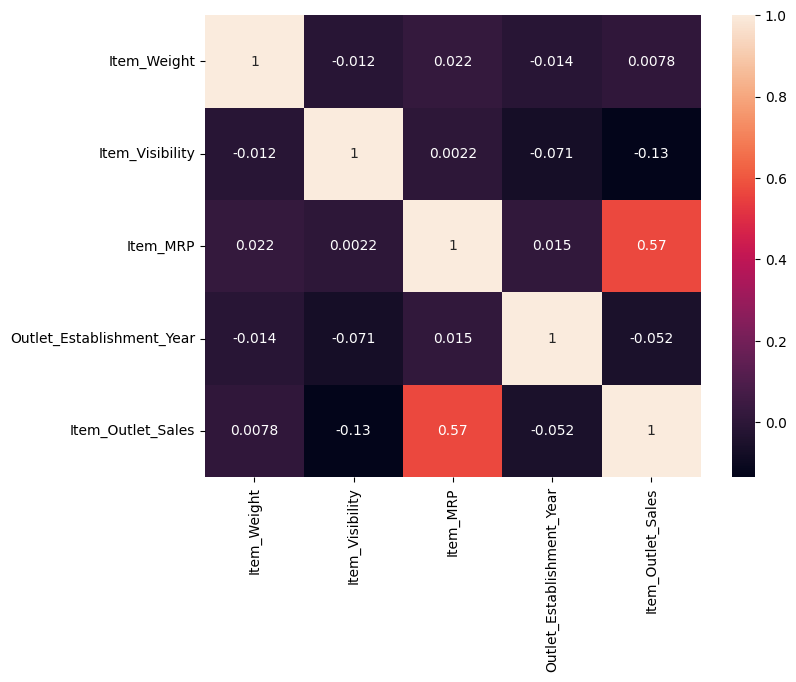

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_data,annot=True)

In [46]:
# drop Item_Identifier as it has too mani category
drop_columns = ['Item_Identifier','Outlet_Identifier','Item_Visibility','Outlet_Establishment_Year']
cat_feats = X_train.drop(columns = drop_columns).select_dtypes(include=['object'])

In [47]:
cat_feats.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,Regular,Food,Small,Tier 3,Grocery Store
655,Non-Edible,Non-Consumable,Small,Tier 1,Supermarket Type1
2229,Regular,Food,Medium,Tier 3,Supermarket Type3
2537,Low Fat,Food,Small,Tier 2,Supermarket Type1
3528,Regular,Food,High,Tier 3,Supermarket Type1


feature encoding - OneHotEncoding

In [48]:
cat_feats.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [49]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [50]:
encoded_features_names = encoder.get_feature_names_out(input_features=cat_feats.columns)
encoded_features_names

array(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Non-Edible',
       'Item_Fat_Content_Regular', 'Item_Type_Drinks', 'Item_Type_Food',
       'Item_Type_Non-Consumable', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [51]:
def cat_encoder(df,encoder):
     # drop Item_Identifier as it has too mani category
     
     df = df.drop(columns = drop_columns)

     cat_feats_final = df.select_dtypes(include=['object'])

     num_feats = df.select_dtypes(exclude=['object']).reset_index(drop=True)
     
     X_train_cat_encoder = pd.DataFrame(encoder.transform(cat_feats_final).toarray(), columns = encoded_features_names)
     df_final = pd.concat([num_feats, X_train_cat_encoder], axis=1)

     return df_final

In [52]:
X_train_final = cat_encoder(X_train,encoder)
X_train_final.head()

,Item_Weight,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Drinks,Item_Type_Food,Item_Type_Non-Consumable,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,116.6466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,103.0332,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,129.1310,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,222.6088,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,184.8266,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [53]:
X_train_final.shape

(5966, 18)

# model evaluation

In [54]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error

train and evalutate models for best fit

In [55]:
def evaluate_model(model, X_train, y_train,cv=5):
  cross_val_scores = cross_validate(model, X_train, y_train,scoring="r2", cv = cv)
  print('model', model)
  r2_scores = cross_val_scores['test_score']
  print('R2 cv Scores - ',r2_scores)
  print('R2 cv Score mean / stdev- ', np.mean(r2_scores),'/',np.std(r2_scores))

In [56]:
# Random Forest Regresion
rf_regressor = RandomForestRegressor(random_state=SEED)
evaluate_model(rf_regressor, X_train_final, y_train)

model RandomForestRegressor(random_state=42)
R2 cv Scores -  [0.52537738 0.50225584 0.50782336 0.54622307 0.50530015]
R2 cv Score mean / stdev-  0.5173959589719381 / 0.016503769641370226


In [57]:
# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=SEED)
evaluate_model(gb_regressor, X_train_final, y_train)

model GradientBoostingRegressor(random_state=42)
R2 cv Scores -  [0.60222738 0.57505773 0.57606617 0.60810724 0.55998152]
R2 cv Score mean / stdev-  0.5842880079524029 / 0.018070854886227564


In [58]:
# XB Boost Regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
evaluate_model(xgb_regressor, X_train_final, y_train)

model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 cv Scores -  [0.5139462  0.47977009 0.46877843 0.49516762 0.41915962]
R2 cv Score mean / stdev-  0.4753643916587498 / 0.03194521984176503


After observing the model evaluation the best model for this dataset is <br>
**Gradient Boosting Regressor**

# Prepare test data

In [59]:
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [60]:
X_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7503,FDI28,14.300,Low Fat,0.026300,Frozen Foods,79.4302,OUT013,1987,High,Tier 3,Supermarket Type1
2957,NCM17,7.930,Low Fat,0.071136,Health and Hygiene,42.7086,OUT046,1997,Small,Tier 1,Supermarket Type1
7031,FDC14,14.500,Regular,0.041313,Canned,42.0454,OUT049,1999,Medium,Tier 1,Supermarket Type1
1084,DRC36,NaN,Regular,0.044767,Soft Drinks,173.7054,OUT027,1985,Medium,Tier 3,Supermarket Type3
856,FDS27,10.195,Regular,0.012456,Meat,197.5110,OUT035,2004,Small,Tier 2,Supermarket Type1


In [61]:
X_test['Outlet_Size'].value_counts()

Outlet_Size
Medium    833
Small     721
High      283
Name: count, dtype: int64

In [62]:
X_test = prepare_dataset(X_test)
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [63]:
X_test_final = cat_encoder(X_test,encoder)
X_test_final.head()

,Item_Weight,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Drinks,Item_Type_Food,Item_Type_Non-Consumable,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,79.4302,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,42.7086,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,42.0454,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,173.7054,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,197.5110,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [64]:
X_test_final.shape

(2557, 18)

# Model traning

In [65]:
# standarized the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_final)
X_test_final = scaler.transform(X_test_final)

In [66]:
# gradian regrassor
gbr = GradientBoostingRegressor(random_state=SEED)
gbr.fit(X_train_final, y_train)

GradientBoostingRegressor(random_state=42)

Prediction

In [67]:
gbr_pred = gbr.predict(X_test_final)

In [68]:
print('Train R Squared value:',r2_score(y_test,gbr_pred))
print('Train RMSE value:',mean_squared_error(y_test,gbr_pred,squared =False ))

Train R Squared value: 0.5973274045338789
Train RMSE value: 1062.018518457392


# New data Prediction

In [69]:
new_data =  pd.read_csv('./dataset/Test.csv')

In [70]:
new_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [71]:
# 5th data of the dataframe
new_df = new_data.iloc[4]
new_df = pd.DataFrame([new_df])
new_df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4,FDY38,NaN,Regular,0.118599,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [72]:
# Preprocess the new data
new_data_processed = prepare_dataset(new_df)
new_data_processed

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4,FDY38,13.6,Regular,0.118599,Food,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [73]:

new_data_final = cat_encoder(new_data_processed,encoder)
new_data_final.head()


,Item_Weight,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Item_Type_Drinks,Item_Type_Food,Item_Type_Non-Consumable,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,13.6,234.23,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [74]:
new_data_scaled = scaler.transform(new_data_final)
new_data_scaled

array([[ 0.1363967 ,  1.47576293, -0.91632671, -0.48523445,  1.35383105,
        -0.32185184,  0.63048948, -0.48523445, -0.34937274,  1.42964246,
        -1.13432794, -0.61623127, -0.69867851,  1.23308153, -0.37745748,
        -1.37038486, -0.35298645,  2.81622757]])

In [75]:
# Make predictions
predictions = gbr.predict(new_data_scaled)

print(predictions)

[6582.5386404]


# pikle

In [76]:
import pickle

In [77]:
pickle.dump(encoder, open('./model/dataencoder.pkl', 'wb'))
pickle.dump(scaler, open('./model/datascaler.pkl', 'wb'))
pickle.dump(gbr, open('./model/model.pkl', 'wb'))

In [78]:
df_data = {
    'columns':X_train.columns,
    'drop_columns':drop_columns,
    'encoded_features_names':encoded_features_names,
    'Item_Id_Weight_Map':Item_Id_Weight_Map,
    'Item_Type_Weight_Map':Item_Type_Weight_Map,
    'mode_outlet_size_Map':mode_outlet_size_Map,
}

pickle.dump(df_data,open('./model/dfdata.pkl','wb'))